In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


## Random Oversampling with Evaluation


In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


## splite data

In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [5]:

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ros, y_ros, test_size=0.25, random_state=42)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

## random forest

In [7]:




# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train1, y_train1)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

rf_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
rf_clf.fit(x_train1, y_train1)

# Predykcje i ocena modelu
ypred_train = rf_clf.predict(x_train1)
ypred_test = rf_clf.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train))
print("Test Results\n")
print(classification_report(y_test1, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test1, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(rf_clf, x_train1, y_train1, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    219310
           1       0.97      0.99      0.98    219323

    accuracy                           0.98    438633
   macro avg       0.98      0.98      0.98    438633
weighted avg       0.98      0.98      0.98    438633

Test Results

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     73112
           1       0.91      0.99      0.95     73099

    accuracy                           0.95    146211
   macro avg       0.95      0.95      0.95    146211
weighted avg       0.95      0.95      0.95    146211

Confusion Matrix:
 [[66327  6785]
 [  820 72279]]
Cross-validation scores: [0.93971069 0.94148894 0.93952831 0.94010898 0.94053074]
Average cross-validation score: 0.9402735318424638


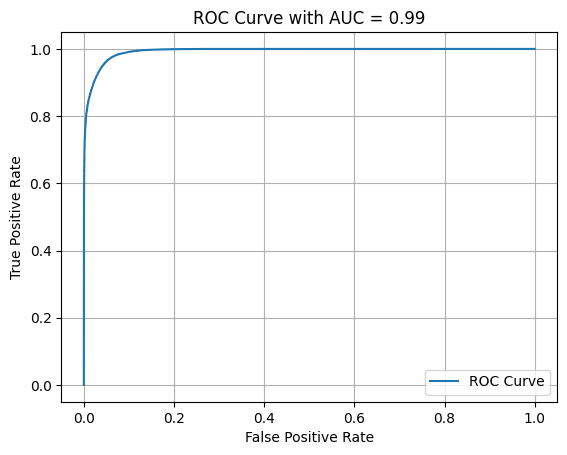

In [8]:

y_proba_test = rf_clf.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [9]:

# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train1, y_train1)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train1, y_train1)

params = {
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'criterion': 'gini'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion'])
best_tree.fit(x_train1, y_train1)

ypred_train2 = best_tree.predict(x_train1)
ypred_test2 = best_tree.predict(x_test1)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train1, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test1, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    219310
           1       0.98      1.00      0.99    219323

    accuracy                           0.99    438633
   macro avg       0.99      0.99      0.99    438633
weighted avg       0.99      0.99      0.99    438633

Testing Results

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     73112
           1       0.91      0.99      0.95     73099

    accuracy                           0.95    146211
   macro avg       0.95      0.95      0.95    146211
weighted avg       0.95      0.95      0.95    146211

Cross-Validation Scores for the Best Model: [0.93779566 0.93804644 0.9373055  0.93784055 0.93855869]
Average Cross-Validation Score: 0.9379093697476104


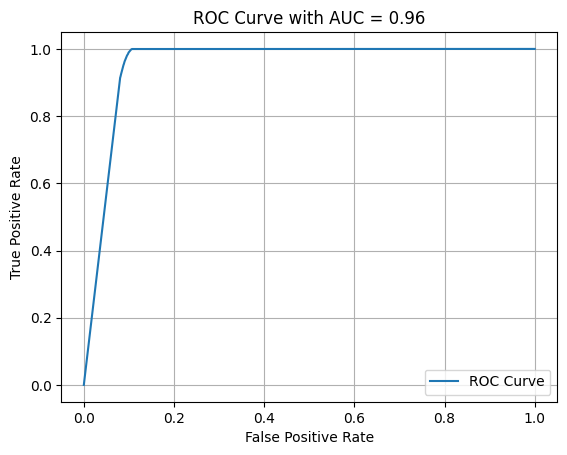

In [10]:

y_proba_test = best_tree.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [11]:
Gnb = GaussianNB()
Gnb.fit(x_train1, y_train1)
ypred_train3 = Gnb.predict(x_train1)
y_pred_test3 = Gnb.predict(x_test1)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test1, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.7070877020196839


In [12]:
print('Testing Results\n')
print(classification_report(y_train1, ypred_train3))

Testing Results

              precision    recall  f1-score   support

           0       0.67      0.82      0.74    219310
           1       0.77      0.60      0.67    219323

    accuracy                           0.71    438633
   macro avg       0.72      0.71      0.71    438633
weighted avg       0.72      0.71      0.71    438633



In [13]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.67      0.82      0.74     73112
           1       0.77      0.60      0.67     73099

    accuracy                           0.71    146211
   macro avg       0.72      0.71      0.70    146211
weighted avg       0.72      0.71      0.70    146211



Cross-Validation Scores for the Best Model: [0.70796904 0.70888096 0.70794624 0.709459   0.7094248 ]
Average Cross-Validation Score: 0.7087360080335524


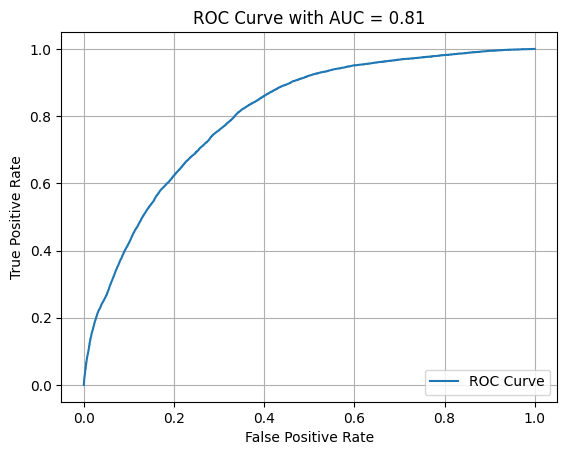

In [14]:
cross_val_scores = cross_val_score(Gnb, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = Gnb.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST


Accuracy on Training set:  0.8156043890906521
Accuracy on Test set:  0.8041939388965262

Training Results

              precision    recall  f1-score   support

           0       0.85      0.77      0.81    219310
           1       0.79      0.86      0.82    219323

    accuracy                           0.82    438633
   macro avg       0.82      0.82      0.82    438633
weighted avg       0.82      0.82      0.82    438633

Testing Results

              precision    recall  f1-score   support

           0       0.83      0.76      0.80     73112
           1       0.78      0.85      0.81     73099

    accuracy                           0.80    146211
   macro avg       0.81      0.80      0.80    146211
weighted avg       0.81      0.80      0.80    146211

Cross-Validation Scores for the Best Model: [0.80353825 0.80424499 0.80342426 0.8023277  0.80477851]
Average Cross-Validation Score: 0.8036627426133736


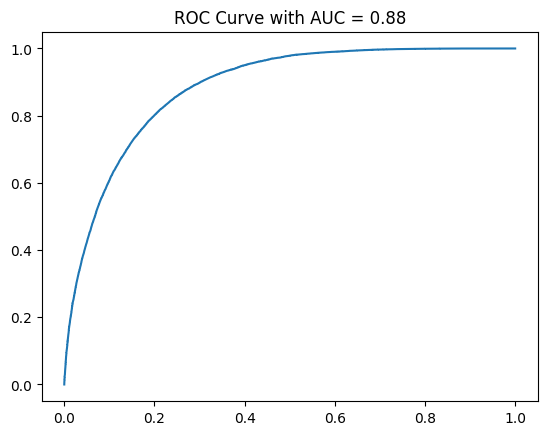

In [15]:




# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.7,
    'colsample_bytree': 0.9
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train1)
y_pred_test4 = best_xg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

cross_val_scores = cross_val_score(best_xg, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.7634446108705911
Accuracy on Test set:  0.7616595194616

Training Results

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    219310
           1       0.75      0.78      0.77    219323

    accuracy                           0.76    438633
   macro avg       0.76      0.76      0.76    438633
weighted avg       0.76      0.76      0.76    438633

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     73112
           1       0.75      0.78      0.76     73099

    accuracy                           0.76    146211
   macro avg       0.76      0.76      0.76    146211
weighted avg       0.76      0.76      0.76    146211

Cross-Validation Scores for the Best Model: [0.76514642 0.76348217 0.76185211 0.76215717 0.76408362]
Average Cross-Validation Score: 0.7633442981996312


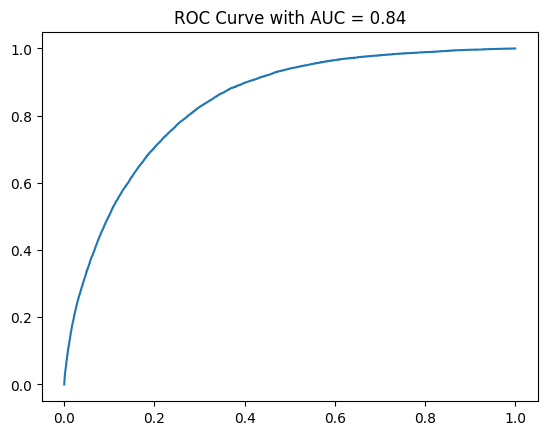

In [16]:


# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.1,
    'penalty': 'l2',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train1)
y_pred_test4 = best_lg.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test4))

cross_val_scores = cross_val_score(best_lg, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.8358445443001324
Accuracy on Test set:  0.8197468042760121

Training Results

              precision    recall  f1-score   support

           0       0.87      0.80      0.83    219310
           1       0.81      0.88      0.84    219323

    accuracy                           0.84    438633
   macro avg       0.84      0.84      0.84    438633
weighted avg       0.84      0.84      0.84    438633

Testing Results

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     73112
           1       0.79      0.87      0.83     73099

    accuracy                           0.82    146211
   macro avg       0.82      0.82      0.82    146211
weighted avg       0.82      0.82      0.82    146211

Cross-Validation Scores for the Best Model: [0.81985022 0.82070514 0.81864192 0.81889064 0.81967718]
Average Cross-Validation Score: 0.8195530191795306


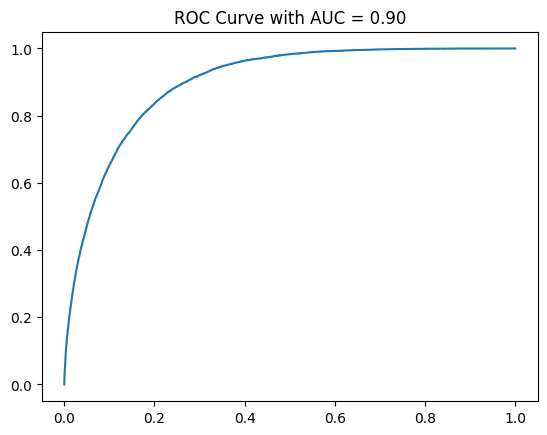

In [17]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train1, y_train1)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train1, y_train1)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train1)
y_pred_test6 = best_gb.predict(x_test1)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train1, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test1, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train1, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test6))

cross_val_scores = cross_val_score(best_gb, x_train1, y_train1, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test1, y_proba_test6)))
plt.show()

## KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [19]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)

In [20]:
grid_cv.fit(x_train1, 
            y_train1)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [21]:
grid_cv.best_score_

0.9375793338187078

In [22]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [23]:
ypred_train8 = grid_cv.predict(x_train1)
y_pred_test8 = grid_cv.predict(x_test1)
print("XGBClassifier Accuracy: ",accuracy_score(y_test1, y_pred_test8))

XGBClassifier Accuracy:  0.9421178981061616


In [24]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    219310
           1       0.98      0.99      0.98    219323

    accuracy                           0.98    438633
   macro avg       0.98      0.98      0.98    438633
weighted avg       0.98      0.98      0.98    438633



In [25]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     73112
           1       0.91      0.98      0.94     73099

    accuracy                           0.94    146211
   macro avg       0.95      0.94      0.94    146211
weighted avg       0.95      0.94      0.94    146211



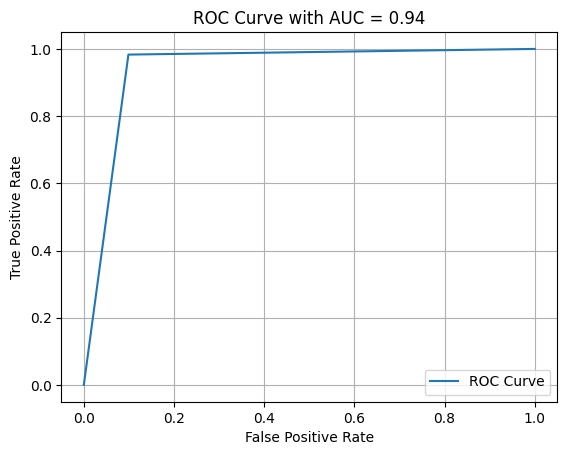

In [26]:
# cross_val_scores = cross_val_score(grid_cv, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = grid_cv.predict_proba(x_test1)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [27]:
ann = tf.keras.models.Sequential()

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [29]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
ann.fit(x_train1, y_train1, batch_size = 32, epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


13708/13708 [==============================] - 21s 1ms/step - loss: 0.4962 - accuracy: 0.7619 - val_loss: 0.4917 - val_accuracy: 0.7639
Epoch 2/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4892 - accuracy: 0.7662 - val_loss: 0.4904 - val_accuracy: 0.7656
Epoch 3/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4884 - accuracy: 0.7668 - val_loss: 0.4891 - val_accuracy: 0.7658
Epoch 4/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4879 - accuracy: 0.7666 - val_loss: 0.4888 - val_accuracy: 0.7653
Epoch 5/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4876 - accuracy: 0.7669 - val_loss: 0.4908 - val_accuracy: 0.7646
Epoch 6/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4874 - accuracy: 0.7671 - val_loss: 0.4888 - val_accuracy: 0.7662
Epoch 7/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4872 - accuracy: 0.7671 - va

In [34]:
ypred_train8 = ann.predict(x_train1)
y_pred_test8 = ann.predict(x_test1)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test1.reshape(len(y_test1),1)),1))

4570/4570 [==============================] - 4s 843us/step
[[1 1]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [35]:
accuracy_score(y_test1, y_pred_test8)

0.7665223546791965

In [36]:
print("Training Results\n")
print(classification_report(y_train1, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       0.80      0.71      0.75    219310
           1       0.74      0.82      0.78    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633



In [37]:
print('Testing Results\n')
print(classification_report(y_test1, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     73112
           1       0.74      0.82      0.78     73099

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211



4570/4570 [==============================] - 4s 832us/step


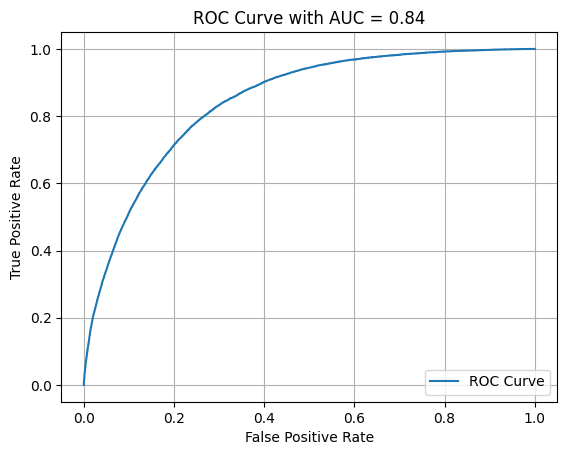

In [38]:
# cross_val_scores = cross_val_score(ann, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = ann.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [39]:

tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4957 - accuracy: 0.7611
Epoch 2/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4900 - accuracy: 0.7651
Epoch 3/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4887 - accuracy: 0.7658
Epoch 4/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4879 - accuracy: 0.7664
Epoch 5/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4872 - accuracy: 0.7670
Epoch 6/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4865 - accuracy: 0.7674
Epoch 7/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4859 - accuracy: 0.7673
Epoch 8/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4853 - accuracy: 0.7676
Epoch 9/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4847 - accuracy: 0.7680
Epoch 10/100
13708/13708 [====================

In [40]:
model_22.evaluate(x_test1,y_test1)

4570/4570 [==============================] - 4s 929us/step - loss: 0.4752 - accuracy: 0.7709


[0.4752020835876465, 0.7708585262298584]

In [41]:
ypred_train22 = model_22.predict(x_train1)
y_pred_test22 = model_22.predict(x_test1)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train1,ypred_train22))
print(classification_report(y_test1,y_pred_test22))

4570/4570 [==============================] - 4s 846us/step
              precision    recall  f1-score   support

           0       0.82      0.71      0.76    219310
           1       0.74      0.84      0.79    219323

    accuracy                           0.77    438633
   macro avg       0.78      0.77      0.77    438633
weighted avg       0.78      0.77      0.77    438633

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     73112
           1       0.74      0.84      0.79     73099

    accuracy                           0.77    146211
   macro avg       0.78      0.77      0.77    146211
weighted avg       0.78      0.77      0.77    146211



4570/4570 [==============================] - 4s 933us/step


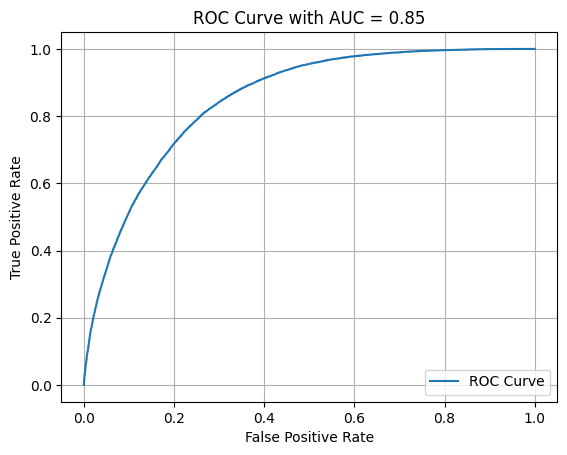

In [42]:
# cross_val_scores = cross_val_score(model_22, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_22.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [43]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train1,y_train1,epochs = 100)

Epoch 1/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4958 - accuracy: 0.7611
Epoch 2/100
13708/13708 [==============================] - 14s 1ms/step - loss: 0.4892 - accuracy: 0.7659
Epoch 3/100
13708/13708 [==============================] - 14s 1ms/step - loss: 0.4884 - accuracy: 0.7668
Epoch 4/100
13708/13708 [==============================] - 14s 1ms/step - loss: 0.4879 - accuracy: 0.7667
Epoch 5/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4876 - accuracy: 0.7671
Epoch 6/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4873 - accuracy: 0.7675
Epoch 7/100
13708/13708 [==============================] - 14s 1ms/step - loss: 0.4871 - accuracy: 0.7671
Epoch 8/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.4870 - accuracy: 0.7673
Epoch 9/100
13708/13708 [==============================] - 14s 1ms/step - loss: 0.4870 - accuracy: 0.7675
Epoch 10/100
13708/13708 [====================

In [44]:
model_2.evaluate(x_test1,y_test1)

4570/4570 [==============================] - 4s 827us/step - loss: 0.4865 - accuracy: 0.7671


[0.4865081012248993, 0.7671447396278381]

In [45]:
ypred_train11 = model_2.predict(x_train1)
y_pred_test11 = model_2.predict(x_test1)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train1,ypred_train11))
print(classification_report(y_test1,y_pred_test11))

4570/4570 [==============================] - 4s 768us/step
              precision    recall  f1-score   support

           0       0.80      0.72      0.76    219310
           1       0.74      0.82      0.78    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     73112
           1       0.74      0.82      0.78     73099

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211



4570/4570 [==============================] - 4s 801us/step


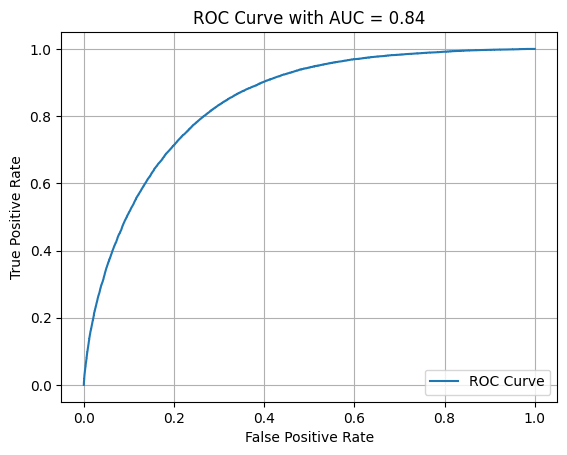

In [46]:
# cross_val_scores = cross_val_score(model_2, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model_2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [47]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
model1.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
13708/13708 [==============================] - 18s 1ms/step - loss: 0.5427 - val_loss: 0.4955
Epoch 2/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5263 - val_loss: 0.4973
Epoch 3/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5242 - val_loss: 0.4978
Epoch 4/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5213 - val_loss: 0.4983
Epoch 5/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5210 - val_loss: 0.5000
Epoch 6/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5205 - val_loss: 0.4992
Epoch 7/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5206 - val_loss: 0.4978
Epoch 8/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5205 - val_loss: 0.5009
Epoch 9/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5204 - val_loss: 0.5001
Epoch 10/100
13708/13708 [====================

In [49]:
ypred_train12 = model1.predict(x_train1)
y_pred_test12 = model1.predict(x_test1)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train1,ypred_train12))
print(classification_report(y_test1,y_pred_test12))

4570/4570 [==============================] - 3s 734us/step
              precision    recall  f1-score   support

           0       0.78      0.74      0.76    219310
           1       0.75      0.79      0.77    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     73112
           1       0.75      0.79      0.77     73099

    accuracy                           0.76    146211
   macro avg       0.76      0.76      0.76    146211
weighted avg       0.76      0.76      0.76    146211



4570/4570 [==============================] - 4s 800us/step


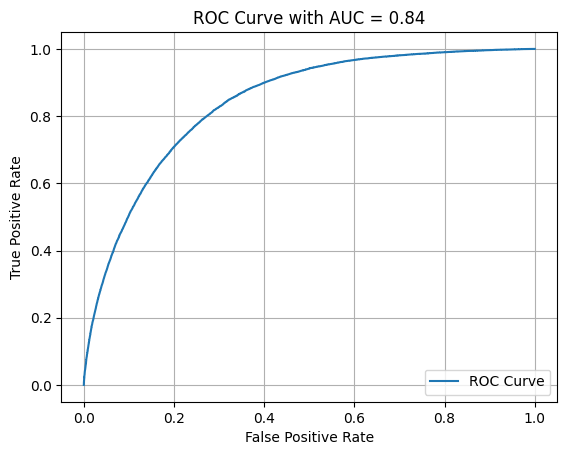

In [50]:
# cross_val_scores = cross_val_score(model1, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model1.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [51]:
model2 = Sequential()



model2.add(Dense(16,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
model2.fit(x=x_train1, 
          y=y_train1, 
          epochs=100,
          validation_data=(x_test1, y_test1), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.5175 - val_loss: 0.4924
Epoch 2/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5038 - val_loss: 0.4916
Epoch 3/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5023 - val_loss: 0.4916
Epoch 4/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5014 - val_loss: 0.4911
Epoch 5/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5009 - val_loss: 0.4933
Epoch 6/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5008 - val_loss: 0.4914
Epoch 7/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5003 - val_loss: 0.4915
Epoch 8/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5000 - val_loss: 0.4917
Epoch 9/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.5004 - val_loss: 0.4935
Epoch 10/100
13708/13708 [====================

In [53]:
ypred_train13 = model2.predict(x_train1)
y_pred_test13 = model2.predict(x_test1)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print("Training Results\n")
print(classification_report(y_train1,ypred_train13))
print("Testing Results\n")
print(classification_report(y_test1,y_pred_test13))

4570/4570 [==============================] - 3s 714us/step
Training Results

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    219310
           1       0.76      0.78      0.77    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     73112
           1       0.76      0.78      0.77     73099

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211



4570/4570 [==============================] - 4s 808us/step


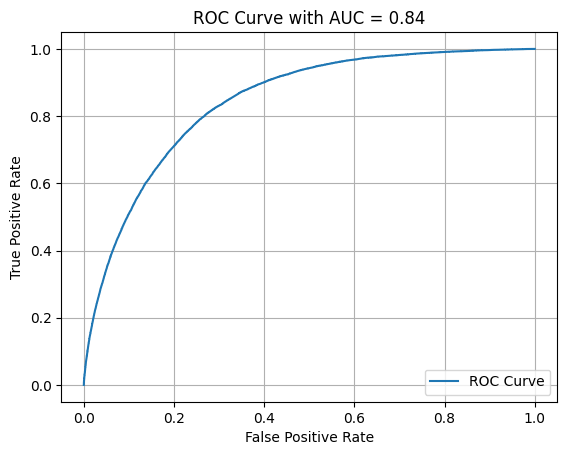

In [54]:
# cross_val_scores = cross_val_score(model2, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model2.predict(x_test1).flatten()

fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [55]:
# model3 = SVC(probability=True)

In [56]:
# model3.fit(x_train1,y_train1)

In [57]:
# ypred_train141 = model3.predict(x_train1)
# y_pred_test141 = model3.predict(x_test1)


# print(classification_report(y_train1,ypred_train141))
# print(classification_report(y_test1,y_pred_test141))

In [58]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
# grid.fit(x_train1,y_train1)

In [61]:
# grid.best_params_

In [62]:
# grid.best_estimator_

In [63]:
# ypred_train = grid.predict(x_train1)
# # y_pred_test = grid.predict(x_test1)


# print(classification_report(y_train1,ypred_train))
# print(classification_report(y_test1,y_pred_test))

In [64]:

# y_proba_test = grid.predict_proba(x_test1)[:, 1]

# fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)

# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.80      0.72      0.76    219310
           1       0.75      0.82      0.78    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.72      0.76     73112
           1       0.74      0.81      0.78     73099

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211



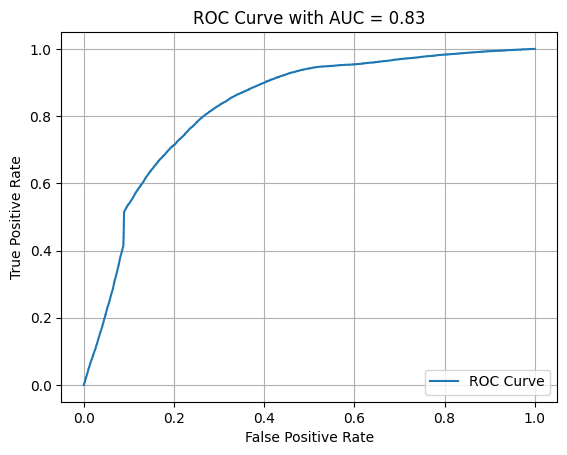

In [65]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train1, y_train1)

ypred_train14 = model3.predict(x_train1)
y_pred_test14 = model3.predict(x_test1)

print("Training Results\n")
print(classification_report(y_train1, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test1, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train1, y_train1, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test1, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test1, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()